# Details
### Objective
To classify the intent of the person and the speech, and to build a simple chatbot using it

### [Dataset Link](https://www.kaggle.com/datasets/elvinagammed/chatbots-intent-recognition-dataset/data)

---
### Resources
1. https://machinehack.com/story/a-gentle-introduction-to-text-analysis-methods-using-python
1. https://towardsdatascience.com/nlp-text-preprocessing-steps-tools-and-examples-94c91ce5d30
1. https://stagezero.ai/blog/text-preprocessing-techniques-nlp/
1. https://medium.com/nerd-for-tech/text-preprocessing-techniques-in-nlp-9431de089582

Text processing and embedding techniques

---
# To Do
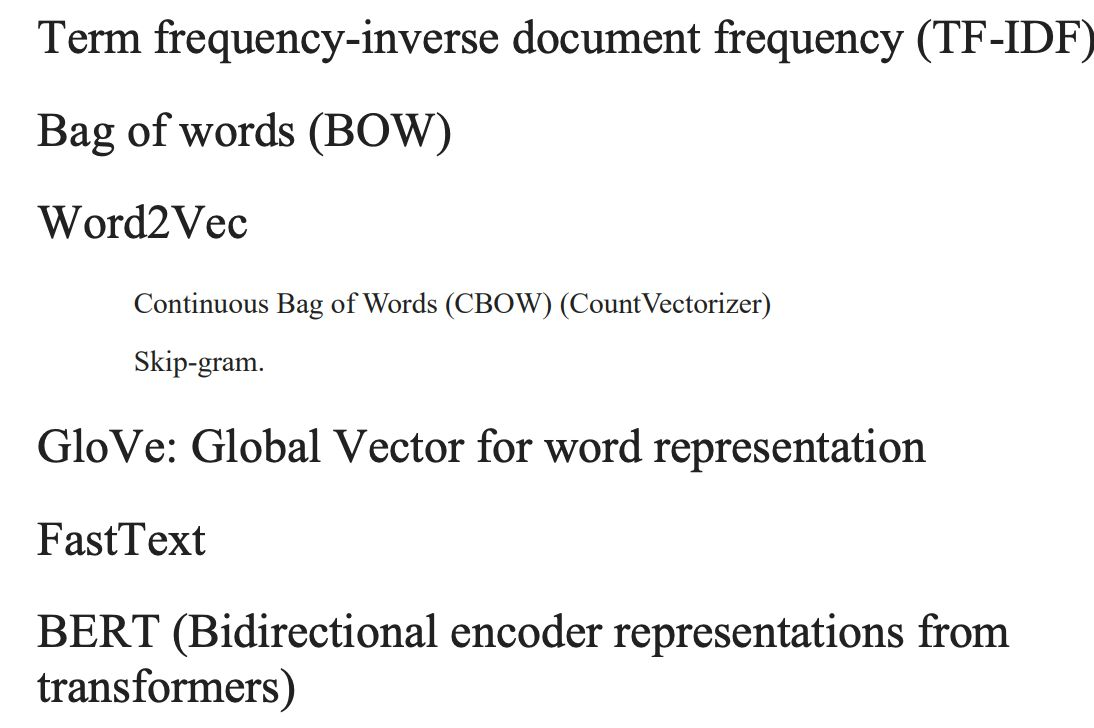

# Import the dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Importing Libraries

In [ ]:
!pip install gensim

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import json
import random
import re
import os
import urllib.request

import spacy
from scipy import spatial

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.manifold import TSNE
import gensim


nlp = spacy.load('en_core_web_sm')

In [ ]:
with open('/content/drive/MyDrive/Shared With Others/NLP Project/Intents.json') as f:
  intents = json.load(f)

In [ ]:
intents

{'intents': [{'intent': 'Greeting',
   'text': ['Hi',
    'Hi there',
    'Hola',
    'Hello',
    'Hello there',
    'Hya',
    'Hya there'],
   'responses': ['Hi human, please tell me your GeniSys user',
    'Hello human, please tell me your GeniSys user',
    'Hola human, please tell me your GeniSys user'],
   'extension': {'function': '', 'entities': False, 'responses': []},
   'context': {'in': '', 'out': 'GreetingUserRequest', 'clear': False},
   'entityType': 'NA',
   'entities': []},
  {'intent': 'GreetingResponse',
   'text': ['My user is Adam',
    'This is Adam',
    'I am Adam',
    'It is Adam',
    'My user is Bella',
    'This is Bella',
    'I am Bella',
    'It is Bella'],
   'responses': ['Great! Hi <HUMAN>! How can I help?',
    'Good! Hi <HUMAN>, how can I help you?',
    'Cool! Hello <HUMAN>, what can I do for you?',
    'OK! Hola <HUMAN>, how can I help you?',
    'OK! hi <HUMAN>, what can I do for you?'],
   'extension': {'function': 'extensions.gHumans.updateHum

# Preprocessing steps

Split them into inputs and targets tensor. The target tensor has a bunch of list with a length of unique title list.

In [ ]:
def preprocessing(line):
    line = re.sub(r'[^a-zA-z.?!\']', ' ', line)
    line = re.sub(r'[ ]+', ' ', line)
    return line

In [ ]:
# Get text and intent title from json data
inputs, targets = [], []

classes = []
intent_doc = {}

for intent in intents['intents']:
    if intent['intent'] not in classes:
        classes.append(intent['intent'])
    if intent['intent'] not in intent_doc:
        intent_doc[intent['intent']] = []

    for text in intent['text']:
        inputs.append(preprocessing(text))
        targets.append(intent['intent'])

    for response in intent['responses']:
        intent_doc[intent['intent']].append(response)

In [ ]:
classes

['Greeting',
 'GreetingResponse',
 'CourtesyGreeting',
 'CourtesyGreetingResponse',
 'CurrentHumanQuery',
 'NameQuery',
 'RealNameQuery',
 'TimeQuery',
 'Thanks',
 'NotTalking2U',
 'UnderstandQuery',
 'Shutup',
 'Swearing',
 'GoodBye',
 'CourtesyGoodBye',
 'WhoAmI',
 'Clever',
 'Gossip',
 'Jokes',
 'PodBayDoor',
 'PodBayDoorResponse',
 'SelfAware']

In [ ]:
inputs

['Hi',
 'Hi there',
 'Hola',
 'Hello',
 'Hello there',
 'Hya',
 'Hya there',
 'My user is Adam',
 'This is Adam',
 'I am Adam',
 'It is Adam',
 'My user is Bella',
 'This is Bella',
 'I am Bella',
 'It is Bella',
 'How are you?',
 'Hi how are you?',
 'Hello how are you?',
 'Hola how are you?',
 'How are you doing?',
 'Hope you are doing well?',
 'Hello hope you are doing well?',
 'Good thanks! My user is Adam',
 'Good thanks! This is Adam',
 'Good thanks! I am Adam',
 'Good thanks! It is Adam',
 'Great thanks! My user is Bella',
 'Great thanks! This is Bella',
 'Great thanks! I am Bella',
 'Great thanks! It is Bella',
 'What is my name?',
 'What do you call me?',
 'Who do you think I am?',
 'What do you think I am?',
 'Who are you talking to?',
 'What name do you call me by?',
 'Tell me my name',
 'What is your name?',
 'What could I call you?',
 'What can I call you?',
 'What do your friends call you?',
 'Who are you?',
 'Tell me your name?',
 'What is your real name?',
 'What is your

In [ ]:
targets

['Greeting',
 'Greeting',
 'Greeting',
 'Greeting',
 'Greeting',
 'Greeting',
 'Greeting',
 'GreetingResponse',
 'GreetingResponse',
 'GreetingResponse',
 'GreetingResponse',
 'GreetingResponse',
 'GreetingResponse',
 'GreetingResponse',
 'GreetingResponse',
 'CourtesyGreeting',
 'CourtesyGreeting',
 'CourtesyGreeting',
 'CourtesyGreeting',
 'CourtesyGreeting',
 'CourtesyGreeting',
 'CourtesyGreeting',
 'CourtesyGreetingResponse',
 'CourtesyGreetingResponse',
 'CourtesyGreetingResponse',
 'CourtesyGreetingResponse',
 'CourtesyGreetingResponse',
 'CourtesyGreetingResponse',
 'CourtesyGreetingResponse',
 'CourtesyGreetingResponse',
 'CurrentHumanQuery',
 'CurrentHumanQuery',
 'CurrentHumanQuery',
 'CurrentHumanQuery',
 'CurrentHumanQuery',
 'CurrentHumanQuery',
 'CurrentHumanQuery',
 'NameQuery',
 'NameQuery',
 'NameQuery',
 'NameQuery',
 'NameQuery',
 'NameQuery',
 'RealNameQuery',
 'RealNameQuery',
 'RealNameQuery',
 'RealNameQuery',
 'RealNameQuery',
 'RealNameQuery',
 'RealNameQuery'

In [ ]:
intent_doc

{'Greeting': ['Hi human, please tell me your GeniSys user',
  'Hello human, please tell me your GeniSys user',
  'Hola human, please tell me your GeniSys user'],
 'GreetingResponse': ['Great! Hi <HUMAN>! How can I help?',
  'Good! Hi <HUMAN>, how can I help you?',
  'Cool! Hello <HUMAN>, what can I do for you?',
  'OK! Hola <HUMAN>, how can I help you?',
  'OK! hi <HUMAN>, what can I do for you?'],
 'CourtesyGreeting': ['Hello, I am great, how are you? Please tell me your GeniSys user',
  'Hello, how are you? I am great thanks! Please tell me your GeniSys user',
  'Hello, I am good thank you, how are you? Please tell me your GeniSys user',
  'Hi, I am great, how are you? Please tell me your GeniSys user',
  'Hi, how are you? I am great thanks! Please tell me your GeniSys user',
  'Hi, I am good thank you, how are you? Please tell me your GeniSys user',
  'Hi, good thank you, how are you? Please tell me your GeniSys user'],
 'CourtesyGreetingResponse': ['Great! Hi <HUMAN>! How can I hel


# Embedding Steps

---
Build a BoW Model for the data

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(inputs)
X = vectorizer.transform(inputs)
print(X)

  (0, 44)	1
  (1, 44)	1
  (1, 92)	1
  (2, 45)	1
  (3, 41)	1
  (4, 41)	1
  (4, 92)	1
  (5, 48)	1
  (6, 48)	1
  (6, 92)	1
  (7, 1)	1
  (7, 52)	1
  (7, 64)	1
  (7, 100)	1
  (8, 1)	1
  (8, 52)	1
  (8, 94)	1
  (9, 1)	1
  (9, 3)	1
  (10, 1)	1
  (10, 52)	1
  (10, 53)	1
  (11, 10)	1
  (11, 52)	1
  (11, 64)	1
  :	:
  (138, 111)	2
  (139, 6)	1
  (139, 7)	1
  (139, 16)	1
  (139, 71)	1
  (139, 73)	1
  (139, 78)	1
  (139, 111)	2
  (140, 6)	1
  (140, 7)	1
  (140, 16)	1
  (140, 71)	1
  (140, 73)	1
  (140, 78)	1
  (140, 111)	2
  (141, 16)	1
  (141, 21)	1
  (141, 39)	1
  (141, 71)	1
  (141, 73)	1
  (141, 111)	2
  (142, 21)	1
  (142, 39)	1
  (142, 73)	1
  (142, 111)	1


In [ ]:
print(X[0:5])

  (0, 44)	1
  (1, 44)	1
  (1, 92)	1
  (2, 45)	1
  (3, 41)	1
  (4, 41)	1
  (4, 92)	1


---
Build a TF IDF Model for the data

In [ ]:
vectorizer = TfidfVectorizer()
vectorizer.fit(inputs)
X = vectorizer.transform(inputs)
print(X)
print(X[0:5])

  (0, 44)	1.0
  (1, 92)	0.7071067811865476
  (1, 44)	0.7071067811865476
  (2, 45)	1.0
  (3, 41)	1.0
  (4, 92)	0.7245231123412152
  (4, 41)	0.6892505057549098
  (5, 48)	1.0
  (6, 92)	0.6852742475579678
  (6, 48)	0.7282851128739766
  (7, 100)	0.571157272525336
  (7, 64)	0.5270834146836976
  (7, 52)	0.38956921280245815
  (7, 1)	0.4941642160691781
  (8, 94)	0.6720971569161214
  (8, 52)	0.4584172747883012
  (8, 1)	0.5814972173974124
  (9, 3)	0.6785446791006158
  (9, 1)	0.7345591320406016
  (10, 53)	0.6421263563404294
  (10, 52)	0.47459785717099123
  (10, 1)	0.6020221062898499
  (11, 100)	0.571157272525336
  (11, 64)	0.5270834146836976
  (11, 52)	0.38956921280245815
  :	:
  (138, 16)	0.36050734613885144
  (139, 111)	0.3766661566264708
  (139, 78)	0.4378654268694105
  (139, 73)	0.3906680363977724
  (139, 71)	0.3499515528661092
  (139, 16)	0.32754365499624327
  (139, 7)	0.4378654268694105
  (139, 6)	0.3038056819952356
  (140, 111)	0.3766661566264708
  (140, 78)	0.4378654268694105
  (140, 73)	0

---
Build a GloVe Model for the data

[Reference](https://analyticsindiamag.com/hands-on-guide-to-word-embeddings-using-glove/#:~:text=It%20is%20an%20unsupervised%20learning%20algorithm%20developed%20by,derive%20the%20relationship%20between%20the%20words%20from%20statistics.)

In [ ]:
urllib.request.urlretrieve('https://nlp.stanford.edu/data/glove.6B.zip','glove.6B.zip')

('glove.6B.zip', <http.client.HTTPMessage at 0x7d249244ddb0>)

In [ ]:
!unzip "/content/glove.6B.zip" -d "/content/"

Archive:  /content/glove.6B.zip
  inflating: /content/glove.6B.50d.txt  
  inflating: /content/glove.6B.100d.txt  
  inflating: /content/glove.6B.200d.txt  
  inflating: /content/glove.6B.300d.txt  


In [ ]:
embeddings_index = {}
with open('/content/glove.6B.50d.txt', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

embedding_matrix = np.zeros((len(vectorizer.vocabulary_) + 1, 50))
for word, i in vectorizer.vocabulary_.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

print(embedding_matrix.shape)

(114, 50)


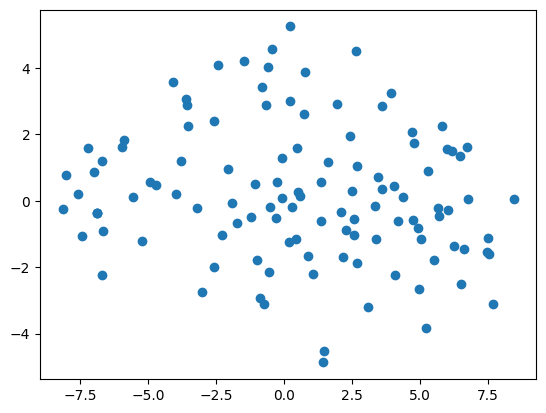

In [ ]:
tsne = TSNE(n_components=2)
Y = tsne.fit_transform(embedding_matrix)

plt.scatter(Y[:, 0], Y[:, 1])
plt.show()

---
Build a Word2Vec Model

References :
1. [Documentation](https://radimrehurek.com/gensim/models/word2vec.html)
1. [Documentation 2](https://radimrehurek.com/gensim/scripts/word2vec2tensor.html)
1. [Tutorial](https://machinelearningmastery.com/develop-word-embeddings-python-gensim/)

In [ ]:
model = gensim.models.Word2Vec([sentence.split() for sentence in inputs], min_count=1)
words = model.wv.index_to_key
embedding_matrix = np.zeros((len(words) + 1, model.vector_size))
for i, word in enumerate(words):
    embedding_matrix[i] = model.wv[word]

In [ ]:
print(embedding_matrix.shape)

(157, 100)


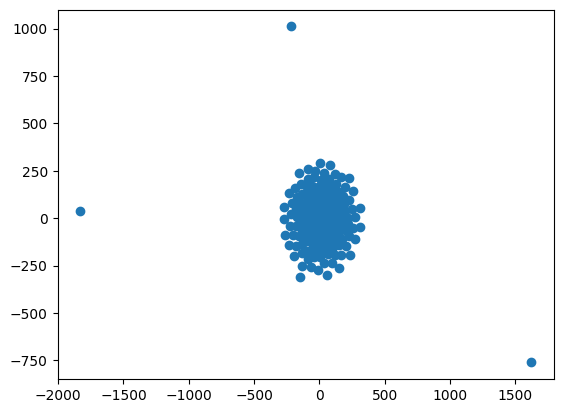

In [ ]:
tsne = TSNE(n_components=2)
Y = tsne.fit_transform(embedding_matrix)

plt.scatter(Y[:, 0], Y[:, 1])
plt.show()

---
Build a tokenizer dictionary and turn sentences into sequences


In [ ]:
def tokenize_data(input_list):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='', oov_token='<unk>')
    tokenizer.fit_on_texts(input_list)
    input_seq = tokenizer.texts_to_sequences(input_list)
    input_seq = tf.keras.preprocessing.sequence.pad_sequences(input_seq, padding='pre')

    return tokenizer, input_seq

In [ ]:
# Preprocess input data
tokenizer, input_tensor = tokenize_data(inputs)

---
Create Categorical columns for the Chatbot

In [ ]:
def create_categorical_target(targets):
    word={}
    categorical_target=[]
    counter=0
    for trg in targets:
        if trg not in word:
            word[trg]=counter
            counter+=1
        categorical_target.append(word[trg])

    categorical_tensor = tf.keras.utils.to_categorical(categorical_target, num_classes=len(word), dtype='int32')
    return categorical_tensor, dict((v,k) for k, v in word.items())

In [ ]:
# Preprocess output data
target_tensor, trg_index_word = create_categorical_target(targets)

In [ ]:
print('input shape: {} and output shape: {}'.format(input_tensor.shape, target_tensor.shape))

input shape: (143, 9) and output shape: (143, 22)
